In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('Cu2', skipinitialspace=True)
df.dropna(axis=1, inplace=True)

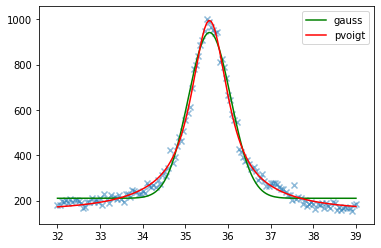

In [3]:
def pvoigt(x, A, mu, sigma, alpha, K):
    sigmag=sigma*math.sqrt(2*math.log(2))
    return ((1-alpha)*A/(sigmag*math.sqrt(2*math.pi))) * (np.exp(-(x-mu)**2 / (2*sigmag**2))) + (alpha*A/math.pi)*(sigma/((x - mu)**2 + sigma**2)) + K


def gauss(x,A,mu,sigma,K):
    return (A / (sigma * math.sqrt(2 * math.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2)))+K


fig, ax = plt.subplots()
ax.plot(df['Angle'], gauss(df['Angle'], 911.575, 35.566, 0.497, 210.500), color='g', label='gauss')

ax.plot(df['Angle'], pvoigt(df['Angle'], 1508.265, 35.565, 0.564, 1.103, 149.717), color='r', label='pvoigt')
plt.scatter(df['Angle'], df['Int'], alpha=0.5, marker='x' )
plt.legend()

In [39]:
df['Angle'].describe()

count    141.000000
mean      35.500000
std        2.042364
min       32.000000
25%       33.750000
50%       35.500000
75%       37.250000
max       39.000000
Name: Angle, dtype: float64

In [12]:
guess = [max(df['Int']), np.mean(df['Angle']), 0.5, 0, min(df['Int'])]

n = len(df['Angle'])
# y = np.empty(n)



In [17]:
df['Angle'][10]

32.5

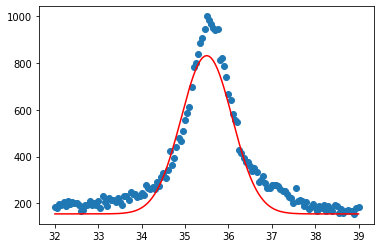

In [13]:
for i in range(n):
    y[i] = pvoigt(df['Angle'][i], guess[0], guess[1], guess[2], guess[3], guess[4])

plt.scatter(df['Angle'], df['Int'])
plt.plot(df['Angle'], y, 'r')

Amplitude: 1508.276,
 Média mu: 35.565,
 Sigma: 0.564,
 Alpha: 1.103,
 K (offset): 149.716


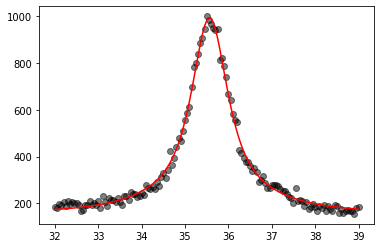

In [14]:
a = df['Angle'].values
s = df['Int'].values
c, cov = curve_fit(pvoigt, a, s, guess)
# print(c)

for i in range(n):
    y[i] = pvoigt(df['Angle'][i], c[0], c[1], c[2], c[3], c[4])

plt.scatter(df['Angle'], df['Int'], alpha=0.5, color='black')
plt.plot(df['Angle'], y, 'r')


print(f'Amplitude: {c[0]:3.3f},\n Média mu: {c[1]:3.3f},\n Sigma: {c[2]:3.3f},\n Alpha: {c[3]:3.3f},\n K (offset): {c[4]:3.3f}')

In [7]:
from sklearn.metrics import r2_score
print('R2: ', r2_score(y, s))

R2:  0.9927881911565772


In [9]:
print(n)

141


In [10]:
581-141

440